### Diffractive metasurface inverse design with topology optimization

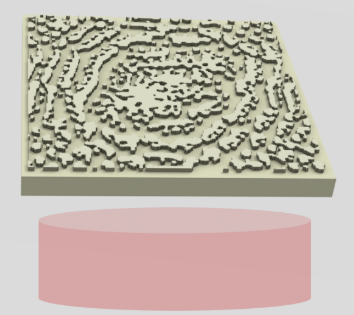

In [4]:
import numpy as np
import matplotlib.pylab as plt

import tidy3d as td
import tidy3d.web as web

In [2]:
print(td.C_0)

299792458000000.0


In [8]:
# 시뮬레이션 매개변수 설정, base frequency
freq0 = td.C_0/0.75 

square = td.Structure(
    geometry=td.Box(center=(0,0,0), 
    size = (1.5, 1.5, 1.5)),
    medium=td.Medium(permittivity=2.0)
)

source = td.PointDipole(
    center=(-1.5, 0, 0),
    source_time=td.GaussianPulse(freq0=freq0, fwidth=freq0 / 10),
    polarization="Ey"
)

monitor = td.FieldMonitor(
    size = (td.inf, td.inf, 0),
    freqs=[freq0],
    name = "fields",
    colocate = True
)

sim = td.Simulation(
    size = (4,3,3),
    grid_spec=td.GridSpec.auto(min_steps_per_wvl=25),
    structures=[square],
    sources=[source],
    monitors=[monitor],
    run_time=120/freq0
)

sim.plot_3d()

simulation grid is shaped [179, 147, 147] for 3 million cells.


15:20:01 대한민국 표준시 Created task 'quickstart' with task_id                 
                         'fdve-f8c67540-93a9-478b-b2d0-549e45dc46c1' and        
                         task_type 'FDTD'.

                  View task using web UI at                                     
                  ]8;id=330403;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f8c67540-93a9-478b-b2d0-549e45dc46c1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=17143;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f8c67540-93a9-478b-b2d0-549e45dc46c1\taskId]8;;\]8;id=330403;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f8c67540-93a9-478b-b2d0-549e45dc46c1\=]8;;\]8;id=548653;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f8c67540-93a9-478b-b2d0-549e45dc46c1\fdve]8;;\]8;id=330403;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f8c67540-93a9-478b-b2d0-549e45dc46c1\-f8c6754]8;;\
                  ]8;id=330403;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f8c67540-93a9-478b-b2d0-549e45dc46c1\0-93a9-478b-b2d0-549e45dc46c1']8;;\.

c:\Users\Min\anaconda3\envs\M2ni\Lib\site-packages\rich\live.py:231: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

15:20:04 대한민국 표준시 status = queued

                  To cancel the simulation, use 'web.abort(task_id)' or         
                  'web.delete(task_id)' or abort/delete the task in the web UI. 
                  Terminating the Python script will not stop the job running on
                  the cloud.

15:20:27 대한민국 표준시 status = preprocess

15:20:29 대한민국 표준시 Maximum FlexCredit cost: 0.025. Use                    
                         'web.real_cost(task_id)' to get the billed FlexCredit  
                         cost after a simulation run.

                  starting up solver

                  running solver

15:20:35 대한민국 표준시 early shutoff detected at 20%, exiting.

                  status = postprocess

15:20:37 대한민국 표준시 status = success

                  View simulation result at                                     
                  ]8;id=911609;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f8c67540-93a9-478b-b2d0-549e45dc46c1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=843244;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f8c67540-93a9-478b-b2d0-549e45dc46c1\taskId]8;;\]8;id=911609;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f8c67540-93a9-478b-b2d0-549e45dc46c1\=]8;;\]8;id=981859;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f8c67540-93a9-478b-b2d0-549e45dc46c1\fdve]8;;\]8;id=911609;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f8c67540-93a9-478b-b2d0-549e45dc46c1\-f8c6754]8;;\
                  ]8;id=911609;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f8c67540-93a9-478b-b2d0-549e45dc46c1\0-93a9-478b-b2d0-549e45dc46c1']8;;\.

15:20:42 대한민국 표준시 loading simulation from data/data.hdf5

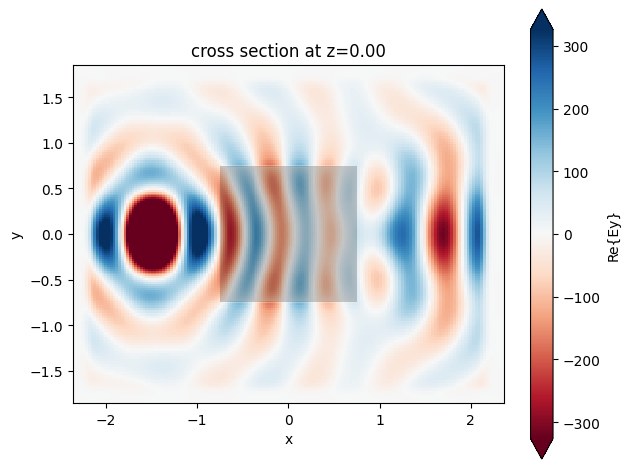

In [8]:
print(
    f"simulation grid is shaped {sim.grid.num_cells} for {int(np.prod(sim.grid.num_cells)/1e6)} million cells."
)

# run simulation
data = td.web.run(sim, task_name="quickstart", path="data/data.hdf5", verbose=True)

# plot the field data stored in the monitor
ax = data.plot_field("fields", "Ey", z=0)